In [103]:
import numpy as np 
import pandas as pd

from sklearn import preprocessing, cross_validation, metrics
%pylab inline
from scipy.sparse import hstack, csr_matrix 
from datetime import datetime

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [ ]:
rs = 19683

work_dir = '/media/maesh/Charming/Documents/Kaggle/2016/expedia/'

trainfile = work_dir + 'train_parsed_booking_drop.csv'
testfile = work_dir + 'test_parsed_booking_drop.csv'

df_train = pd.read_csv(trainfile) # in both, dfs have negative values for trip len?
df_test = pd.read_csv(testfile)

count    3.000693e+06
mean     3.129063e+02
std      2.044980e+02
min      0.000000e+00
25%      1.740000e+02
50%      3.140000e+02
75%      3.950000e+02
max      1.027000e+03
Name: user_location_region, dtype: float64


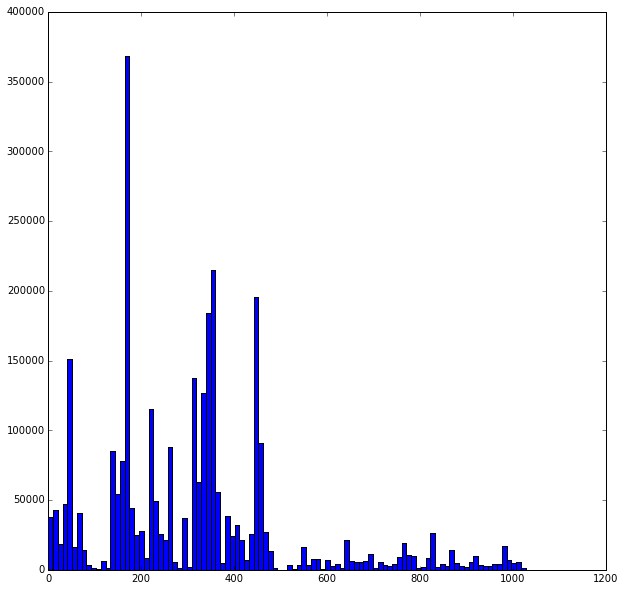

In [6]:
print(df_train['user_location_region'].describe())
plt.figure(figsize=(10,10))
plt.hist(df_train['user_location_region'],bins=100)
plt.show()

Over 1000 possibilities, may be best to just drop it.

In [66]:
hc_group = df_train.groupby(df_train['srch_destination_id'])
# hc_group_vcs = hc_group['hotel_cluster'].value_counts()

In [85]:
hc_group.get_group(8250)['hotel_cluster'].value_counts()[:5].index.get_values()

array([ 1, 45, 79, 24, 54])

In [100]:
df_train['hotel_cluster'].value_counts()[:5].index.get_values()

array([91, 48, 42, 59, 28])

In [59]:
np.sum(df_train['srch_destination_id']==8250)

97678

Go ahead and try to make a submission

In [ ]:
submit = pd.DataFrame()

def makespace(x):    
    return " ".join([str(int(z)) for z in x])

start = datetime.now()
for i, idx in enumerate(df_test['id'].values) :
    submit['id'] = idx
    sd_idx = df_test[df_test['id']==idx]['srch_destination_id'].values[0]
    try :
        # top 5 hotel clusters for specific srch_destination_id
        hotels = hc_group.get_group(sd_idx)['hotel_cluster'].value_counts()[:5].index.get_values()
    except KeyError:
        # if we don't know search destination hotel cluster, just guess top 5 overall
        hotels = df_train['hotel_cluster'].value_counts()[:5].index.get_values()
    submit['hotel_cluster'] = makespace(hotels)
    if i % 1000000 == 0:
        print("%s\t%s"%(i, datetime.now() - start))